In [1]:
import numpy as np
f=np.load("/home/amorelli/QU_foreground_tau/2_6_23/check_r_distribution.npz")
y_val=f["y_val"]
y_train=f["y_train"]

In [2]:
print(y_val.shape)
print(y_train.shape)
print(np.min(y_train))
print(y_train[:200])

(10800, 1)
(89200, 1)
0.01
[[0.10928274]
 [0.10928274]
 [0.10928274]
 [0.10928274]
 [0.10928274]
 [0.10928274]
 [0.10928274]
 [0.10928274]
 [0.10928274]
 [0.10928274]
 [0.10928274]
 [0.10928274]
 [0.10928274]
 [0.10928274]
 [0.10928274]
 [0.10928274]
 [0.08786489]
 [0.08786489]
 [0.08786489]
 [0.08786489]
 [0.08786489]
 [0.08786489]
 [0.08786489]
 [0.08786489]
 [0.08786489]
 [0.08786489]
 [0.08786489]
 [0.08786489]
 [0.08796497]
 [0.08796497]
 [0.08796497]
 [0.08796497]
 [0.09266889]
 [0.09266889]
 [0.09266889]
 [0.09266889]
 [0.09276897]
 [0.09276897]
 [0.09276897]
 [0.09276897]
 [0.09276897]
 [0.09276897]
 [0.09276897]
 [0.09276897]
 [0.09276897]
 [0.09276897]
 [0.09276897]
 [0.09276897]
 [0.0371226 ]
 [0.0371226 ]
 [0.0371226 ]
 [0.0371226 ]
 [0.0371226 ]
 [0.0371226 ]
 [0.0371226 ]
 [0.0371226 ]
 [0.0371226 ]
 [0.0371226 ]
 [0.0371226 ]
 [0.0371226 ]
 [0.0371226 ]
 [0.0371226 ]
 [0.0371226 ]
 [0.0371226 ]
 [0.10928274]
 [0.10928274]
 [0.10928274]
 [0.10928274]
 [0.10928274]
 [0.109

In [3]:
import matplotlib.pyplot as plt
#print(y_val[:100])

In [4]:
def check_y(y_train):
    y_train=np.sort(y_train,axis=0)
    y_count=[]
    y_red=[]
    prev_index=0
    for i in range(1,len(y_train)):
        if y_train[i] != y_train[i-1]:
            y_count.append(i-prev_index)
            prev_index=i
            y_red.append(y_train[i-1])
        else:
            pass
    return y_count, y_red
y_count, y_red = check_y(y_train) 

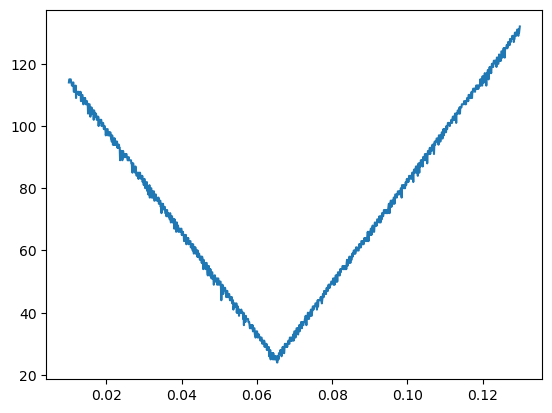

In [5]:
#print(y_red)
plt.plot(y_red,y_count)

In [6]:
print(y_count[:10])
print(y_train[:400])

[205, 204, 204, 204, 203, 203, 203, 202, 202, 202]
[[0.0021747 ]
 [0.0021747 ]
 [0.0021747 ]
 [0.0021747 ]
 [0.0021747 ]
 [0.0021747 ]
 [0.0021747 ]
 [0.0021747 ]
 [0.0021747 ]
 [0.0021747 ]
 [0.0021747 ]
 [0.0021747 ]
 [0.0021747 ]
 [0.0021747 ]
 [0.0021747 ]
 [0.0021747 ]
 [0.0021747 ]
 [0.0021747 ]
 [0.0021747 ]
 [0.0021747 ]
 [0.0021747 ]
 [0.0021747 ]
 [0.0021747 ]
 [0.0021747 ]
 [0.0021747 ]
 [0.0021838 ]
 [0.0021838 ]
 [0.0021838 ]
 [0.0021838 ]
 [0.0021838 ]
 [0.0021838 ]
 [0.0021838 ]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00833485]
 [0.00210191]
 [0.00210191]
 [0.00210191]
 [0.0021019

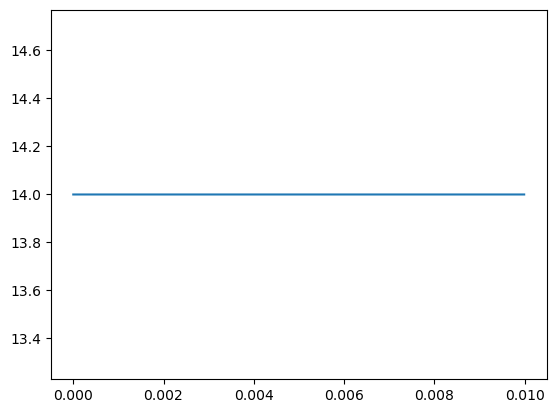

In [7]:
y_count_v=[]
y_red_v=[]
prev_index=0
for i in range(1,len(y_val)):
    if y_val[i] != y_val[i-1]:
        y_count_v.append(i-prev_index)
        prev_index=i
        y_red_v.append(y_val[i-1])
    else:
        pass
plt.plot(y_red_v,y_count_v)